## Student Perfomance Indicator

#### Life Cycle of Machine Learning Project

- Understanding the Problem Statment
- Data Collection
- Data Checks to Perform 
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- choose best model

**1) Problem Statement**

- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

**2) Data Collection**

- Data Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The Data consist of 8 columns and 1000 rows

**2.1 Import Data and Required Packages**<br>
- Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

- Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv("data/stud.csv")

**Show Top 5 Records**

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Shape of the Dataset**

In [6]:
df.shape

(1000, 8)

**2.2 Dataset Information**
- gender : sex of studnets
- race/ethinicit : ethnicity of students
- parental level of education : Parent's Final education
- lunch : hsving lunch berf befoe test
- test preparation course: compile or not complete befortest
- math score
- reading score
- writing score

## **3. Data Checks to Perform**
- Check Missing Values
- Check Duplicates
- Check Data Type
- Check the Number of unique values of each column
- Check Stastice of data set
- Check Various categories present in the different Categorical Columnlumn

**3.1 Check Missing Duplicates**

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**Ther are no Missing values in the dataset**

**3.2 Check Duplicates**

In [8]:
df.duplicated().sum()

0

**There are No duplicates in the data set**

**3.3 Check data types**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**3.4 Checking the number of unique values of each column**

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

**3.5 Check statistics of dataset**

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insights**
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

**3.6 Check various Categories present in the different categorical columns**

In [12]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


**3.7 Exploring Data**

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
# define Numerical & Categorical Data
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

#print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


**3.8 Adding Columns for "Total Score" and "Average Score"**

In [15]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

df['average'] = df['total_score'] / 3 

In [16]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


**Number of Full marks Scorers:**

In [17]:
math_full = df[df['math_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
reading_full = df[df ['reading_score'] == 100]['average'].count()

# print the results
print(f"Number of sudents with full marks in maths: {math_full}")
print(f"Number of students with full marks in writing: {writing_full}")
print(f"Number of students with full makrs in reading: {reading_full}")


Number of sudents with full marks in maths: 7
Number of students with full marks in writing: 14
Number of students with full makrs in reading: 17


**Number of students scored less than 20**

In [18]:
reading_less = df[df['reading_score'] <= 20]['average'].count()
writing_less = df[df['writing_score'] <= 20]['average'].count()
math_less = df[df['math_score'] <= 20]['average'].count()

print(f"Number of studens scored less than 20 in maths: {math_less}")
print(f"Number of studens scored less than 20 in writing: {writing_less}")
print(f"Number of studens scored less than 20 in reading: {reading_less}")

Number of studens scored less than 20 in maths: 4
Number of studens scored less than 20 in writing: 3
Number of studens scored less than 20 in reading: 1


## **4. Exploring Data (Visualization)**

**4.1 Visualize average score distribution to make some conclusion.**
- Histogram
- Kernel Distribution Function (KDE)

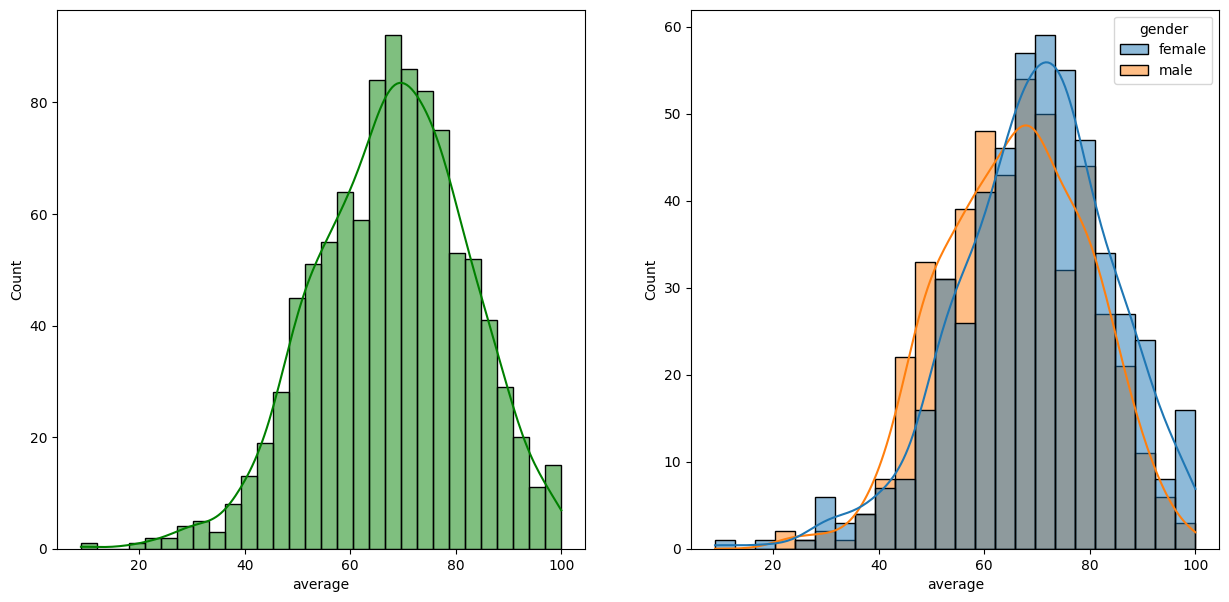

In [22]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x = 'average', bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df, x = 'average', kde=True, hue='gender')
plt.show()

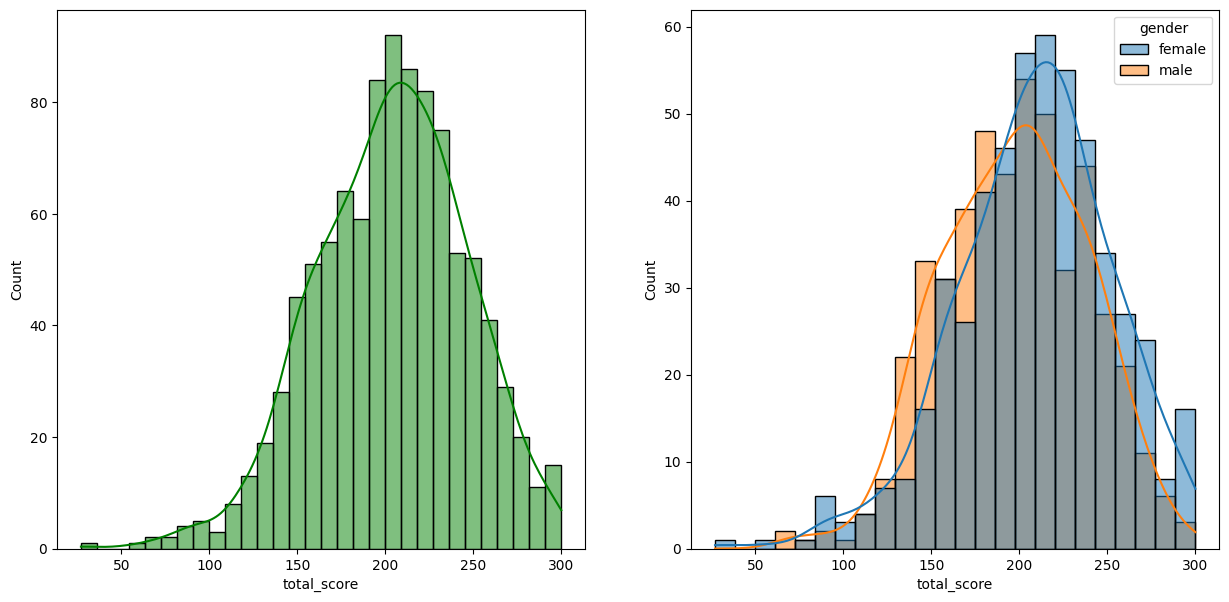

In [25]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='green')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

**Observations:**
- Female students tend to perform well then male students.
- Majority of the Students tend to have a Average in between 65-75 marks.
  

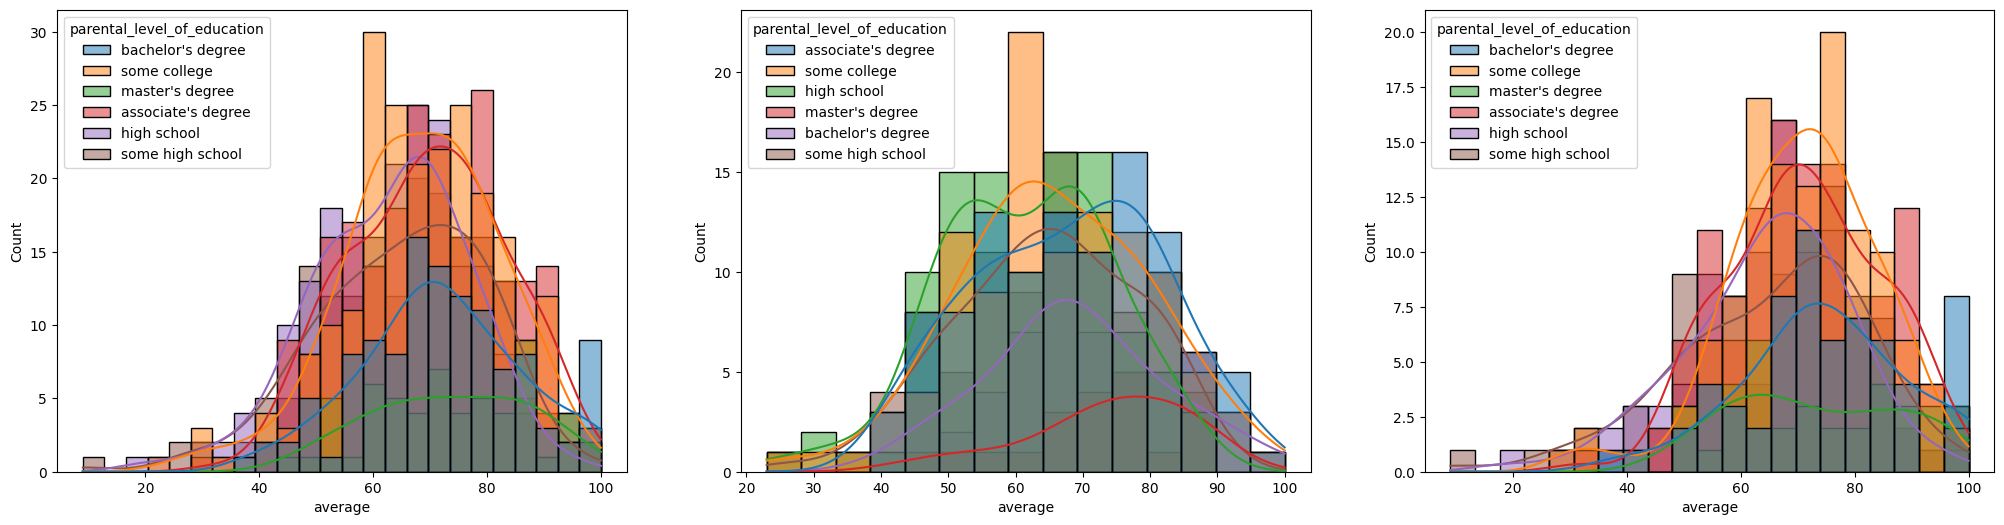

In [28]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

**Observations:**
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

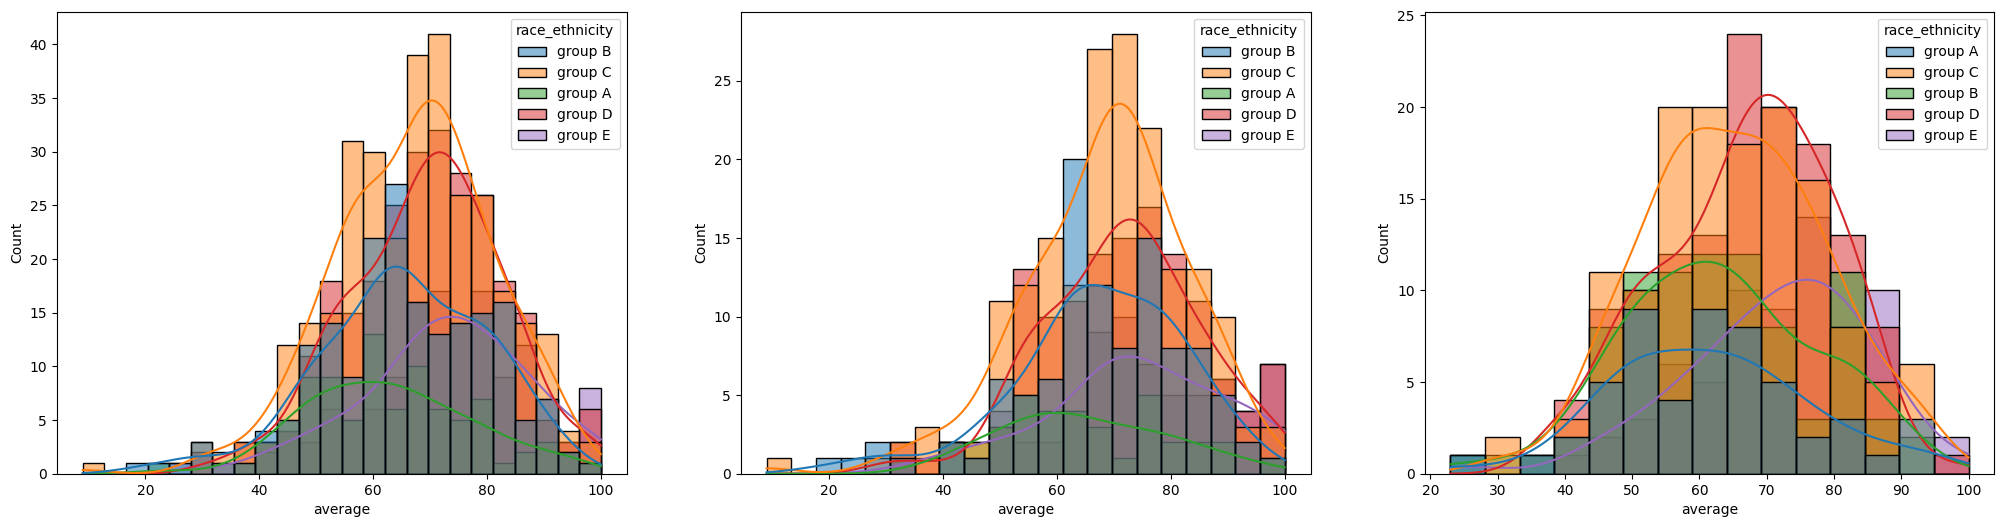

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

**Observations:**
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

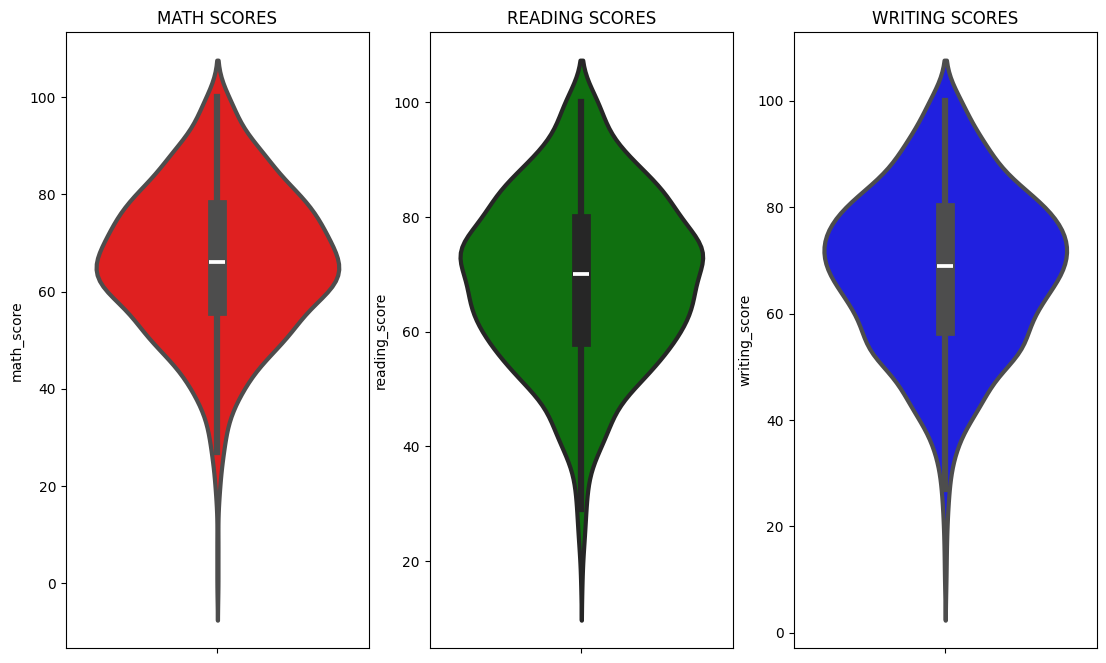

In [33]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

**Observations**
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

<Axes: xlabel='lunch', ylabel='writing_score'>

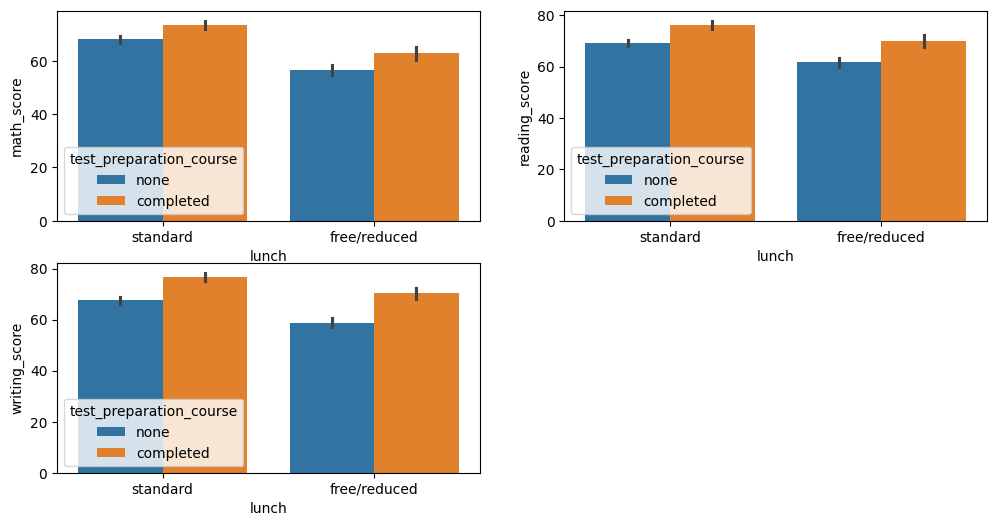

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

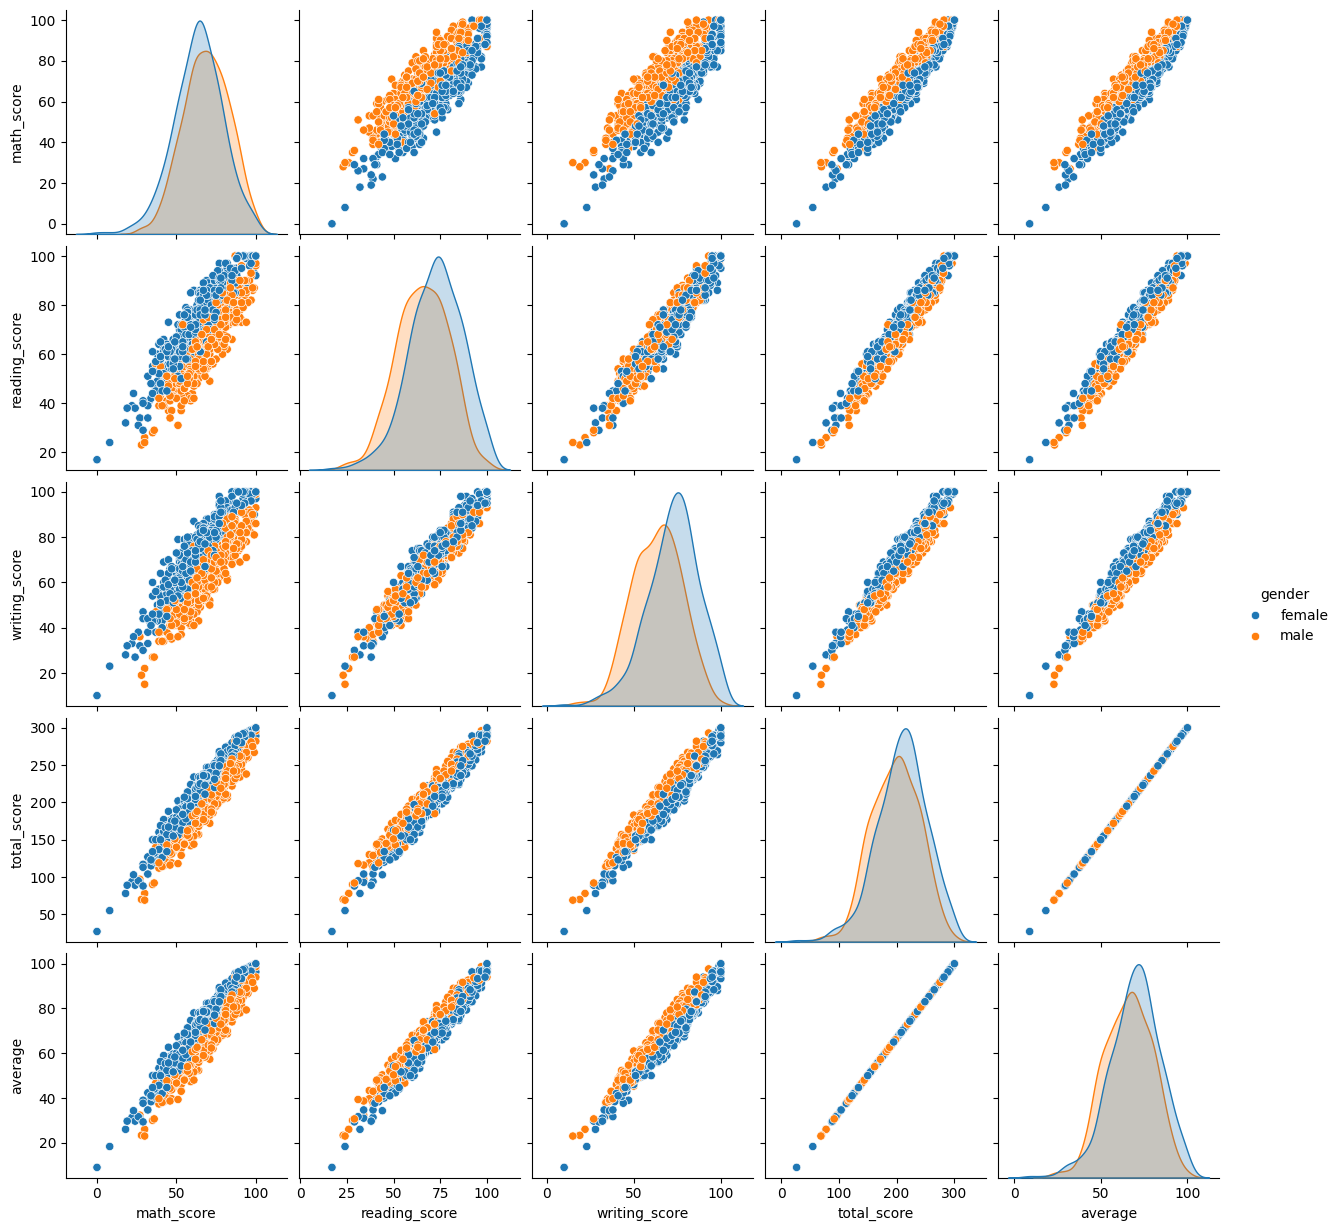

In [35]:
# Multivariate Analysis
sns.pairplot(df,hue = 'gender')
plt.show()

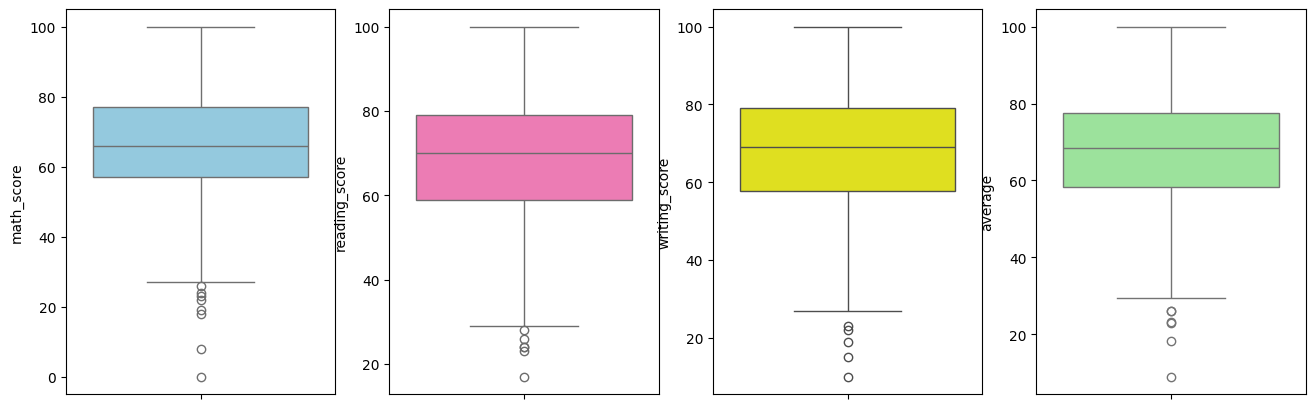

In [37]:
#Checking Outliers
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

## **5. Conclusions**
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.